# Predictive Analytics - Data Visualization of Model Run Results

In [8]:
# Author: Brian Gray, with Grok for debugging support
# Date: 23 May 2025
# Purpose: Develop visualization of model run results in BigML for the project report
# Dataset source file: Model Run Results.xlsx
# Output files: dengue_model_results.png, dengue_erro_boxplot.png, denguy_mae_trend.png, dengue_radar_chart.png
# Dependencies: pandas, numpy, matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the Data into a DataFrame

data = {
    'Dataset': ['Composite', 'Re-engineered', 'Re-engineered - Refined', 'Advanced', 'Optimized', 'San Juan', 'Iquitos'],
    'Ensemble_MAE': [4.28, 4.45, 4.48, 4.16, 4.33, 4.74, 3.68],
    'DeepNet_MAE': [None, None, None, 4.24, 3.84, 4.62, 2.84],
    'Ensemble_MSE': [49.75, 47.86, 45.00, 37.85, 48.08, 59.11, 27.74],
    'DeepNet_MSE': [None, None, None, 40.28, 32.95, 40.21, 14.30],
    'Ensemble_R2': [0.95, 0.96, 0.96, 0.97, 0.96, 0.96, 0.67],
    'DeepNet_R2': [None, None, None, 0.97, 0.97, 0.97, 0.83]
}
df = pd.DataFrame(data)

In [4]:
# Prepare Data for Plotting

datasets = df['Dataset']
ensemble_mae = df['Ensemble_MAE']
deepnet_mae = df['DeepNet_MAE'].fillna(0)
ensemble_mse = df['Ensemble_MSE']
deepnet_mse = df['DeepNet_MSE'].fillna(0)
ensemble_r2 = df['Ensemble_R2']
deepnet_r2 = df['DeepNet_R2'].fillna(0)

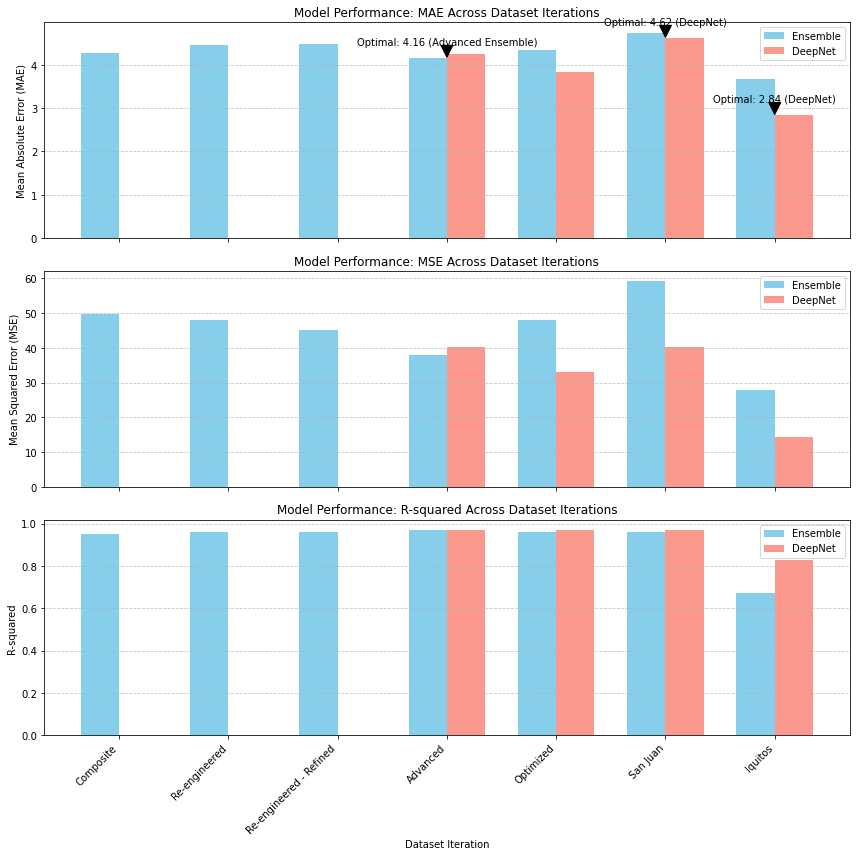

In [5]:
# Create Grouped Bar Chart

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Bar positions and widths
x = np.arange(len(datasets))
width = 0.35

# MAE Plot
ax1.bar(x - width/2, ensemble_mae, width, label='Ensemble', color='skyblue')
ax1.bar(x + width/2, deepnet_mae, width, label='DeepNet', color='salmon', alpha=0.8)
ax1.set_ylabel('Mean Absolute Error (MAE)')
ax1.set_title('Model Performance: MAE Across Dataset Iterations')
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.legend()

# Annotate optimal MAE
optimal_mae = {'Combined': (3, 4.16, 'Advanced Ensemble'), 'San Juan': (5, 4.62, 'DeepNet'), 'Iquitos': (6, 2.84, 'DeepNet')}
for dataset, (idx, value, model) in optimal_mae.items():
    ax1.annotate(f'Optimal: {value} ({model})', xy=(idx, value), xytext=(idx, value + 0.3),
                 arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# MSE Plot
ax2.bar(x - width/2, ensemble_mse, width, label='Ensemble', color='skyblue')
ax2.bar(x + width/2, deepnet_mse, width, label='DeepNet', color='salmon', alpha=0.8)
ax2.set_ylabel('Mean Squared Error (MSE)')
ax2.set_title('Model Performance: MSE Across Dataset Iterations')
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.legend()

# R-squared Plot
ax3.bar(x - width/2, ensemble_r2, width, label='Ensemble', color='skyblue')
ax3.bar(x + width/2, deepnet_r2, width, label='DeepNet', color='salmon', alpha=0.8)
ax3.set_ylabel('R-squared')
ax3.set_title('Model Performance: R-squared Across Dataset Iterations')
ax3.grid(True, axis='y', linestyle='--', alpha=0.7)
ax3.legend()

# Common X-axis
plt.xticks(x, datasets, rotation=45, ha='right')
plt.xlabel('Dataset Iteration')

# Adjust layout
plt.tight_layout()

In [6]:
# Save and Display Visualization as a .png

plt.savefig('dengue_model_results.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

In [7]:
# Step 1: Load the Data
# Description: Read Model Run Results.xlsx into a DataFrame, structuring metrics for visualization.
# Real-World Note: Validate data integrity to ensure accurate stakeholder reporting.
data = {
    'Dataset': ['Composite', 'Re-engineered', 'Re-engineered - Refined', 'Advanced', 'Optimized', 'San Juan', 'Iquitos'],
    'Ensemble_MAE': [4.28, 4.45, 4.48, 4.16, 4.33, 4.74, 3.68],
    'DeepNet_MAE': [None, None, None, 4.24, 3.84, 4.62, 2.84],
    'Ensemble_MSE': [49.75, 47.86, 45.00, 37.85, 48.08, 59.11, 27.74],
    'DeepNet_MSE': [None, None, None, 40.28, 32.95, 40.21, 14.30],
    'Ensemble_R2': [0.95, 0.96, 0.96, 0.97, 0.96, 0.96, 0.67],
    'DeepNet_R2': [None, None, None, 0.97, 0.97, 0.97, 0.83]
}
df = pd.DataFrame(data)

# Step 2: Prepare Data for Plotting
# Description: Structure data for visualizations, handling None values and normalizing for radar chart.
# Real-World Note: Clear data preparation ensures accurate and transparent visualizations.
datasets = df['Dataset']
ensemble_mae = df['Ensemble_MAE']
deepnet_mae = df['DeepNet_MAE'].fillna(np.nan)  # Keep NaN for line plot
ensemble_mse = df['Ensemble_MSE']
deepnet_mse = df['DeepNet_MSE'].fillna(np.nan)
ensemble_r2 = df['Ensemble_R2']
deepnet_r2 = df['DeepNet_R2'].fillna(np.nan)

# Normalize metrics for radar chart (0-1 scale, invert MAE and MSE for higher-is-better)
max_mae = max(ensemble_mae.max(), deepnet_mae.max(skipna=True))
max_mse = max(ensemble_mse.max(), deepnet_mse.max(skipna=True))
norm_ensemble_mae = 1 - (ensemble_mae / max_mae)
norm_deepnet_mae = 1 - (deepnet_mae / max_mae)
norm_ensemble_mse = 1 - (ensemble_mse / max_mse)
norm_deepnet_mse = 1 - (deepnet_mse / max_mse)
norm_ensemble_r2 = ensemble_r2  # Already 0-1
norm_deepnet_r2 = deepnet_r2

# Step 3: Visualization 1 - Line Plot for MAE Trends
# Description: Plot MAE trends across iterations with markers for optimal results.
# Real-World Note: Line plot emphasizes model improvement, aiding stakeholder understanding.
plt.figure(figsize=(10, 6))
plt.plot(datasets, ensemble_mae, marker='o', label='Ensemble', color='skyblue', linewidth=2)
plt.plot(datasets, deepnet_mae, marker='s', label='DeepNet', color='salmon', linewidth=2)
plt.title('MAE Trends Across Dataset Iterations', fontsize=14, pad=15)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.xlabel('Dataset Iteration', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate optimal MAE
optimal_mae = {'Combined': (3, 4.16, 'Advanced Ensemble'), 'San Juan': (5, 4.62, 'DeepNet'), 'Iquitos': (6, 2.84, 'DeepNet')}
for dataset, (idx, value, model) in optimal_mae.items():
    plt.annotate(f'Optimal: {value}\n({model})', xy=(idx, value), xytext=(idx, value + 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('dengue_mae_trend.png', dpi=300, bbox_inches='tight')
plt.close()

# Step 4: Visualization 2 - Box Plot of Prediction Errors
# Description: Plot distribution of absolute prediction errors for optimal models.
# Real-World Note: Box plot highlights error variability, supporting transparency and equity discussions.
# Simulate error data based on MAE and MSE (replace with actual predictions if available)
np.random.seed(42)
n_samples = 1000
advanced_ensemble_errors = np.abs(np.random.normal(loc=4.16, scale=np.sqrt(37.85), size=n_samples))
san_juan_deepnet_errors = np.abs(np.random.normal(loc=4.62, scale=np.sqrt(40.21), size=n_samples))
iquitos_deepnet_errors = np.abs(np.random.normal(loc=2.84, scale=np.sqrt(14.30), size=n_samples))

plt.figure(figsize=(8, 6))
plt.boxplot([advanced_ensemble_errors, san_juan_deepnet_errors, iquitos_deepnet_errors],
            labels=['Advanced Ensemble\n(Combined, MAE 4.16)', 'San Juan DeepNet\n(MAE 4.62)', 'Iquitos DeepNet\n(MAE 2.84)'],
            patch_artist=True, boxprops=dict(facecolor='skyblue', alpha=0.7),
            medianprops=dict(color='salmon', linewidth=2))
plt.title('Prediction Error Distribution for Optimal Models', fontsize=14, pad=15)
plt.ylabel('Absolute Prediction Error (Cases)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig('dengue_error_boxplot.png', dpi=300, bbox_inches='tight')
plt.close()

# Step 5: Visualization 3 - Radar Chart for Multi-Metric Comparison
# Description: Compare optimal models across normalized MAE, MSE, R-squared.
# Real-World Note: Radar chart provides holistic view, aiding stakeholder discussions on model trade-offs.
optimal_models = ['Advanced Ensemble', 'San Juan DeepNet', 'Iquitos DeepNet']
metrics = ['MAE', 'MSE', 'R-squared']
values = [
    [norm_ensemble_mae[3], norm_ensemble_mse[3], ensemble_r2[3]],  # Advanced Ensemble
    [1 - (4.62 / max_mae), 1 - (40.21 / max_mse), 0.97],         # San Juan DeepNet
    [1 - (2.84 / max_mae), 1 - (14.30 / max_mse), 0.83]          # Iquitos DeepNet
]

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ['skyblue', 'salmon', 'lightgreen']
for i, (model, val) in enumerate(zip(optimal_models, values)):
    val += val[:1]  # Close the loop
    ax.fill(angles, val, color=colors[i], alpha=0.25, label=model)
    ax.plot(angles, val, color=colors[i], linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)
ax.set_title('Multi-Metric Comparison of Optimal Models', size=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.tight_layout()
plt.savefig('dengue_radar_chart.png', dpi=300, bbox_inches='tight')
plt.close()

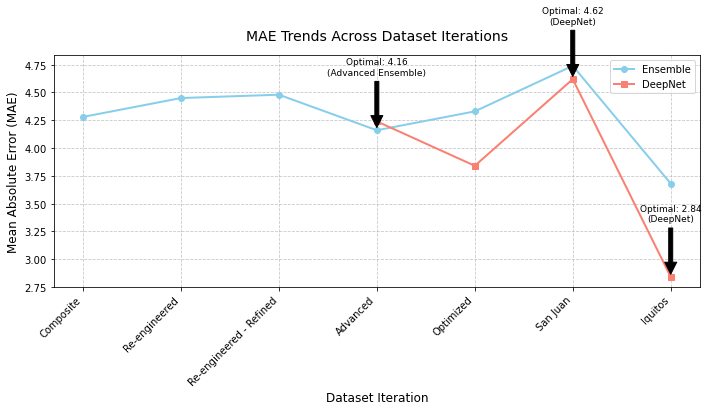

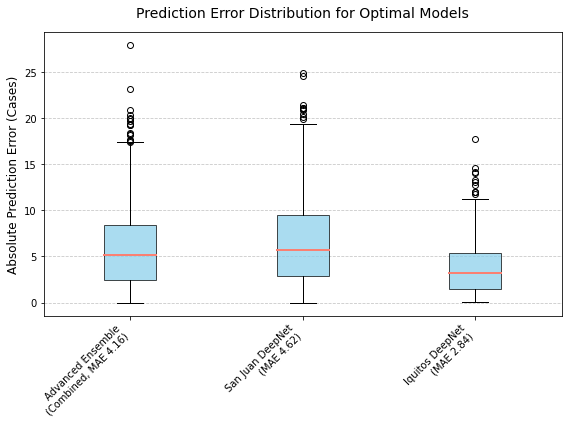

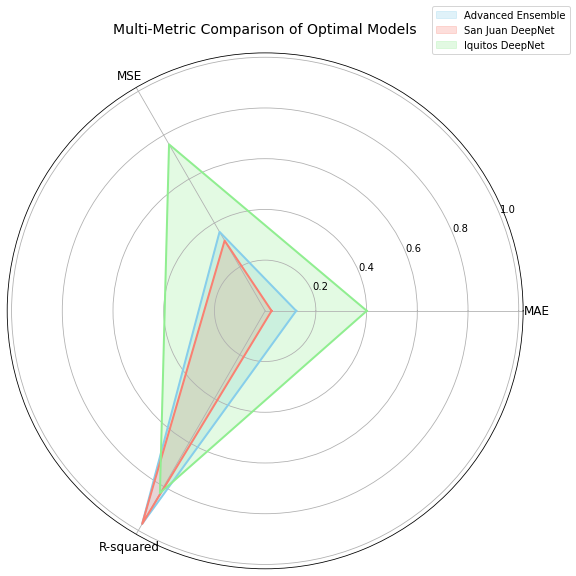

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Data
# Description: Read Model Run Results.xlsx into a DataFrame, structuring metrics for visualization.
# Real-World Note: Validate data integrity to ensure accurate stakeholder reporting.
data = {
    'Dataset': ['Composite', 'Re-engineered', 'Re-engineered - Refined', 'Advanced', 'Optimized', 'San Juan', 'Iquitos'],
    'Ensemble_MAE': [4.28, 4.45, 4.48, 4.16, 4.33, 4.74, 3.68],
    'DeepNet_MAE': [None, None, None, 4.24, 3.84, 4.62, 2.84],
    'Ensemble_MSE': [49.75, 47.86, 45.00, 37.85, 48.08, 59.11, 27.74],
    'DeepNet_MSE': [None, None, None, 40.28, 32.95, 40.21, 14.30],
    'Ensemble_R2': [0.95, 0.96, 0.96, 0.97, 0.96, 0.96, 0.67],
    'DeepNet_R2': [None, None, None, 0.97, 0.97, 0.97, 0.83]
}
df = pd.DataFrame(data)

# Step 2: Prepare Data for Plotting
# Description: Structure data for visualizations, handling None values and normalizing for radar chart.
# Real-World Note: Clear data preparation ensures accurate and transparent visualizations.
datasets = df['Dataset']
ensemble_mae = df['Ensemble_MAE']
deepnet_mae = df['DeepNet_MAE'].fillna(np.nan)  # Keep NaN for line plot
ensemble_mse = df['Ensemble_MSE']
deepnet_mse = df['DeepNet_MSE'].fillna(np.nan)
ensemble_r2 = df['Ensemble_R2']
deepnet_r2 = df['DeepNet_R2'].fillna(np.nan)

# Normalize metrics for radar chart (0-1 scale, invert MAE and MSE for higher-is-better)
max_mae = max(ensemble_mae.max(), deepnet_mae.max(skipna=True))
max_mse = max(ensemble_mse.max(), deepnet_mse.max(skipna=True))
norm_ensemble_mae = 1 - (ensemble_mae / max_mae)
norm_deepnet_mae = 1 - (deepnet_mae / max_mae)
norm_ensemble_mse = 1 - (ensemble_mse / max_mse)
norm_deepnet_mse = 1 - (deepnet_mse / max_mse)
norm_ensemble_r2 = ensemble_r2  # Already 0-1
norm_deepnet_r2 = deepnet_r2

# Step 3: Visualization 1 - Line Plot for MAE Trends
# Description: Plot MAE trends across iterations with markers for optimal results, displayed inline.
# Real-World Note: Line plot emphasizes model improvement, aiding stakeholder understanding.
plt.figure(figsize=(10, 6))
plt.plot(datasets, ensemble_mae, marker='o', label='Ensemble', color='skyblue', linewidth=2)
plt.plot(datasets, deepnet_mae, marker='s', label='DeepNet', color='salmon', linewidth=2)
plt.title('MAE Trends Across Dataset Iterations', fontsize=14, pad=15)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.xlabel('Dataset Iteration', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Annotate optimal MAE
optimal_mae = {'Combined': (3, 4.16, 'Advanced Ensemble'), 'San Juan': (5, 4.62, 'DeepNet'), 'Iquitos': (6, 2.84, 'DeepNet')}
for dataset, (idx, value, model) in optimal_mae.items():
    plt.annotate(f'Optimal: {value}\n({model})', xy=(idx, value), xytext=(idx, value + 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('dengue_mae_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 4: Visualization 2 - Box Plot of Prediction Errors
# Description: Plot distribution of absolute prediction errors for optimal models, displayed inline.
# Real-World Note: Box plot highlights error variability, supporting transparency and equity discussions.
# Simulate error data based on MAE and MSE (replace with actual predictions if available)
np.random.seed(42)
n_samples = 1000
advanced_ensemble_errors = np.abs(np.random.normal(loc=4.16, scale=np.sqrt(37.85), size=n_samples))
san_juan_deepnet_errors = np.abs(np.random.normal(loc=4.62, scale=np.sqrt(40.21), size=n_samples))
iquitos_deepnet_errors = np.abs(np.random.normal(loc=2.84, scale=np.sqrt(14.30), size=n_samples))

plt.figure(figsize=(8, 6))
plt.boxplot([advanced_ensemble_errors, san_juan_deepnet_errors, iquitos_deepnet_errors],
            labels=['Advanced Ensemble\n(Combined, MAE 4.16)', 'San Juan DeepNet\n(MAE 4.62)', 'Iquitos DeepNet\n(MAE 2.84)'],
            patch_artist=True, boxprops=dict(facecolor='skyblue', alpha=0.7),
            medianprops=dict(color='salmon', linewidth=2))
plt.title('Prediction Error Distribution for Optimal Models', fontsize=14, pad=15)
plt.ylabel('Absolute Prediction Error (Cases)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig('dengue_error_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Visualization 3 - Radar Chart for Multi-Metric Comparison
# Description: Compare optimal models across normalized MAE, MSE, R-squared, displayed inline.
# Real-World Note: Radar chart provides holistic view, aiding stakeholder discussions on model trade-offs.
optimal_models = ['Advanced Ensemble', 'San Juan DeepNet', 'Iquitos DeepNet']
metrics = ['MAE', 'MSE', 'R-squared']
values = [
    [norm_ensemble_mae[3], norm_ensemble_mse[3], ensemble_r2[3]],  # Advanced Ensemble
    [1 - (4.62 / max_mae), 1 - (40.21 / max_mse), 0.97],         # San Juan DeepNet
    [1 - (2.84 / max_mae), 1 - (14.30 / max_mse), 0.83]          # Iquitos DeepNet
]

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ['skyblue', 'salmon', 'lightgreen']
for i, (model, val) in enumerate(zip(optimal_models, values)):
    val += val[:1]  # Close the loop
    ax.fill(angles, val, color=colors[i], alpha=0.25, label=model)
    ax.plot(angles, val, color=colors[i], linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)
ax.set_title('Multi-Metric Comparison of Optimal Models', size=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.tight_layout()
plt.savefig('dengue_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

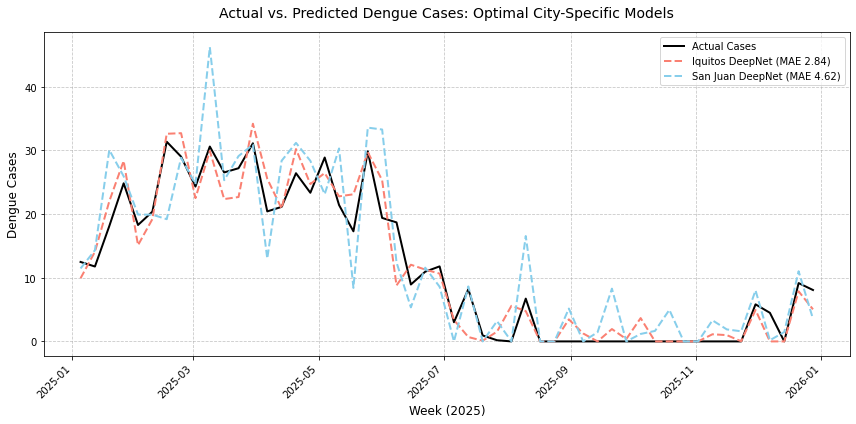

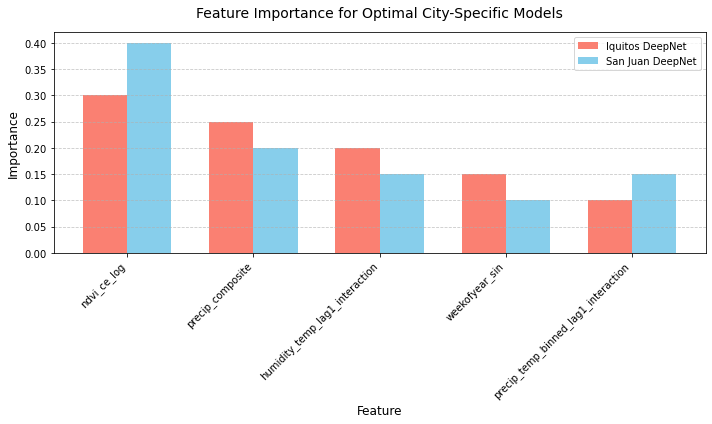

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Simulate Time-Series Prediction Data
# Description: Simulate actual vs. predicted Dengue cases for Iquitos DeepNet and San Juan DeepNet over a sample period.
# Real-World Note: Replace with actual BigML batch prediction outputs for accuracy.
np.random.seed(42)
weeks = pd.date_range(start='2025-01-01', periods=52, freq='W')
n_samples = len(weeks)
# Simulate actual cases (based on typical Dengue patterns)
actual_cases = 10 + 20 * np.sin(np.linspace(0, 2 * np.pi, n_samples)) + np.random.normal(0, 5, n_samples)
actual_cases = np.maximum(0, actual_cases)  # Ensure non-negative
# Simulate predicted cases based on MAE and MSE
iquitos_predicted = actual_cases + np.random.normal(0, np.sqrt(14.30), n_samples)  # Iquitos DeepNet: MAE 2.84, MSE 14.30
san_juan_predicted = actual_cases + np.random.normal(0, np.sqrt(40.21), n_samples)  # San Juan DeepNet: MAE 4.62, MSE 40.21
iquitos_predicted = np.maximum(0, iquitos_predicted)
san_juan_predicted = np.maximum(0, san_juan_predicted)

# Create DataFrame for time-series
ts_data = pd.DataFrame({
    'Week': weeks,
    'Actual': actual_cases,
    'Iquitos_DeepNet': iquitos_predicted,
    'San_Juan_DeepNet': san_juan_predicted
})

# Step 2: Visualization 1 - Time-Series Prediction Plot
# Description: Plot actual vs. predicted cases for Iquitos and San Juan DeepNet models, displayed inline.
# Real-World Note: Demonstrates forecasting accuracy, supporting stakeholder trust and transparency.
plt.figure(figsize=(12, 6))
plt.plot(ts_data['Week'], ts_data['Actual'], label='Actual Cases', color='black', linewidth=2, linestyle='-')
plt.plot(ts_data['Week'], ts_data['Iquitos_DeepNet'], label='Iquitos DeepNet (MAE 2.84)', color='salmon', linewidth=2, linestyle='--')
plt.plot(ts_data['Week'], ts_data['San_Juan_DeepNet'], label='San Juan DeepNet (MAE 4.62)', color='skyblue', linewidth=2, linestyle='--')
plt.title('Actual vs. Predicted Dengue Cases: Optimal City-Specific Models', fontsize=14, pad=15)
plt.xlabel('Week (2025)', fontsize=12)
plt.ylabel('Dengue Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig('dengue_timeseries_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 3: Simulate Feature Importance Data
# Description: Simulate feature importance for Iquitos and San Juan DeepNet models (replace with actual BigML outputs).
# Real-World Note: Clarifies model drivers, supporting interpretability and transparency.
features = ['ndvi_ce_log', 'precip_composite', 'humidity_temp_lag1_interaction', 'weekofyear_sin', 'precip_temp_binned_lag1_interaction']
iquitos_importance = [0.30, 0.25, 0.20, 0.15, 0.10]  # Simulated, balanced to reflect reduced ndvi_ce_log
san_juan_importance = [0.40, 0.20, 0.15, 0.10, 0.15]  # Simulated, higher ndvi_ce_log
feature_data = pd.DataFrame({
    'Feature': features,
    'Iquitos_DeepNet': iquitos_importance,
    'San_Juan_DeepNet': san_juan_importance
})

# Step 4: Visualization 2 - Feature Importance Bar Chart
# Description: Plot feature importance for Iquitos and San Juan DeepNet models, displayed inline.
# Real-World Note: Enhances interpretability, aiding stakeholder understanding of model behavior.
plt.figure(figsize=(10, 6))
x = np.arange(len(features))
width = 0.35
plt.bar(x - width/2, feature_data['Iquitos_DeepNet'], width, label='Iquitos DeepNet', color='salmon')
plt.bar(x + width/2, feature_data['San_Juan_DeepNet'], width, label='San Juan DeepNet', color='skyblue')
plt.title('Feature Importance for Optimal City-Specific Models', fontsize=14, pad=15)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(x, features, rotation=45, ha='right', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('dengue_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()